In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats

In [3]:
ab_df = pd.read_csv('../data/data1/antibodies_rate.csv')
ab_df

,patient,IgM,IgG,IgM+IgG
0,CHID46,0.261554,0.241568,0.503122
1,CHID77,0.317600,0.066923,0.362000
2,CHID79,0.154923,0.064222,0.190846
3,CHID32,0.224462,0.097577,0.322038
4,CHID40,0.117885,0.229596,0.347481
5,CHID08,0.093962,0.113101,0.197189


In [4]:
k_df = pd.read_csv('../MATLAB/new_work/k.csv') 
k_df

,k
0,1.486030
1,0.042013
2,0.013120
3,0.021517
4,0.170156
5,0.035013


In [5]:
df = ab_df
df['k'] = k_df['k']
df.sort_values('k')

,patient,IgM,IgG,IgM+IgG,k
2,CHID79,0.154923,0.064222,0.190846,0.013120
3,CHID32,0.224462,0.097577,0.322038,0.021517
5,CHID08,0.093962,0.113101,0.197189,0.035013
1,CHID77,0.317600,0.066923,0.362000,0.042013
4,CHID40,0.117885,0.229596,0.347481,0.170156
0,CHID46,0.261554,0.241568,0.503122,1.486030


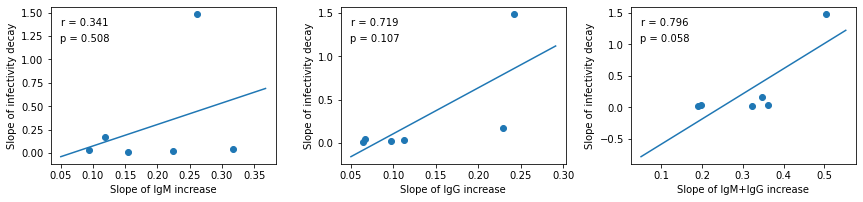

In [60]:
plt.figure(figsize=(12,8),tight_layout=True)
cols = df.columns[1:-1]
for n in range(3):
    ax = plt.subplot(331+n)
#     ax.set_xlim(left=0, right=0.4)
#     ax.set_ylim(bottom=0, top=0.4)
    
#     x = df[cols[n]]
    plt.scatter(df[cols[n]],df['k'],label=cols[n])
   
    X = df[cols[n]].values.reshape(-1,1)
    y = df['k'].values
    reg = LinearRegression().fit(X,y)
    k = reg.coef_[0]
    b = reg.intercept_
    t = np.arange(0.05,max(X) + 0.05, (max(X)-min(X))/100)
    plt.plot(t, k*t+b)    
    
    r,p = scipy.stats.pearsonr(df[cols[n]], df['k'])

    plt.text(0.15, 0.9,'r = '+ str(round(r,3)),horizontalalignment='center',verticalalignment='center',transform = ax.transAxes)
    plt.text(0.15, 0.8,'p = '+ str(round(p,3)),horizontalalignment='center',verticalalignment='center',transform = ax.transAxes)

    
    plt.xlabel('Slope of '+cols[n]+ ' increase')
    plt.ylabel('Slope of infectivity decay')
#     plt.legend()
#     plt.title(patient_cols[n])    

plt.show()

In [8]:

dg = df.sort_values('k')[:-1]
dg

,patient,IgM,IgG,IgM+IgG,k
2,CHID79,0.154923,0.064222,0.190846,0.013120
3,CHID32,0.224462,0.097577,0.322038,0.021517
5,CHID08,0.093962,0.113101,0.197189,0.035013
1,CHID77,0.317600,0.066923,0.362000,0.042013
4,CHID40,0.117885,0.229596,0.347481,0.170156


In [27]:
dg.columns[1]

'IgM'

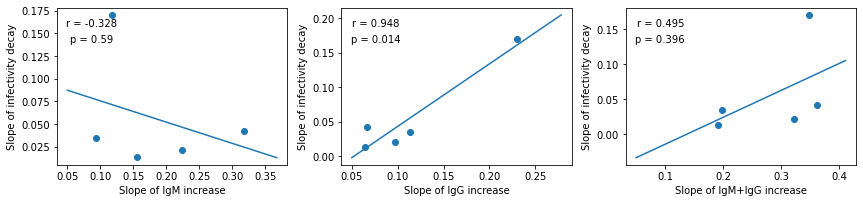

In [63]:
plt.figure(figsize=(12,8),tight_layout=True)
cols = dg.columns[1:-1]
for n in range(3):
    ax = plt.subplot(331+n)
#     ax.set_xlim(left=0.05, right=0.4)
#     ax.set_ylim(bottom=0, top=0.4)
    
#     x = df[cols[n]]
    plt.scatter(dg[cols[n]],dg['k'],label=cols[n])

    X = dg[dg.columns[n+1]].values.reshape(-1,1)
    y = dg['k'].values
    reg = LinearRegression().fit(X,y)
    k = reg.coef_[0]
    b = reg.intercept_
    t = np.arange(0.05,max(X) + 0.05, (max(X)-min(X))/100)
    plt.plot(t, k*t+b)    

    r,p = scipy.stats.pearsonr(dg[cols[n]], dg['k'])

    plt.text(0.15, 0.9,'r = '+ str(round(r,3)),horizontalalignment='center',verticalalignment='center',transform = ax.transAxes)
    plt.text(0.15, 0.8,'p = '+ str(round(p,3)),horizontalalignment='center',verticalalignment='center',transform = ax.transAxes)


    plt.xlabel('Slope of '+cols[n]+ ' increase')
    plt.ylabel('Slope of infectivity decay')
#     plt.legend()
#     plt.title(patient_cols[n])    

plt.show()